# Import data and required packages

In [2]:
# Basic Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings

ModuleNotFoundError: No module named 'sklearn'

In [4]:
df=pd.read_csv("HeartDisease.csv")

In [5]:
#show top 5 records
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# Preparing X and Y variable
X = df.drop(columns=["target"],axis=1)

In [7]:
X.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
Y = df["target"]

In [9]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [12]:
logreg = LogisticRegression()

In [13]:
logreg.fit(X_train,Y_train)
logreg.score(X_test,Y_test)

C:\Users\Ruby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8852459016393442

In [15]:
y_pred = logreg.predict(X_test)
print(y_pred)

[0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0]


In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [17]:
from sklearn import metrics

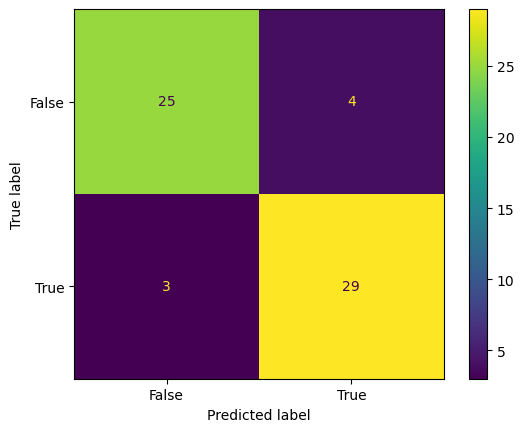

In [19]:
confusion_matrix=metrics.confusion_matrix(Y_test,y_pred)
confusion_matrix=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
confusion_matrix.plot()
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8852459016393442

In [21]:
from sklearn.metrics import precision_score
precision_score(Y_test,y_pred)

0.8787878787878788

In [22]:
from sklearn.metrics import recall_score
recall_score(Y_test,y_pred)

0.90625

In [23]:
from sklearn.metrics import f1_score
f1_score(Y_test,y_pred)

0.8923076923076922

In [24]:
pd.crosstab(Y_test,y_pred, rownames=['True'], colnames=['y_pred'], margins=True)

y_pred,0,1,All
True,,,
0,25,4,29
1,3,29,32
All,28,33,61


In [25]:
# Model Prepare from RandomForest
RFC=RandomForestClassifier(n_estimators=220)
RFC.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=220)

In [26]:
predictions=RFC.predict(X_test)
from sklearn.metrics import confusion_matrix

In [28]:
print(confusion_matrix(Y_test,predictions))

[[24  5]
 [ 3 29]]


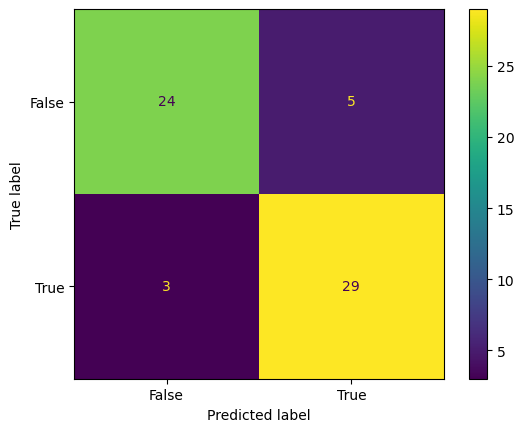

In [29]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(Y_test,predictions)
confusion_matrix=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
confusion_matrix.plot()
plt.show()

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8852459016393442

In [31]:
from sklearn.metrics import precision_score
precision_score(Y_test,y_pred,average=None)

array([0.89285714, 0.87878788])

In [32]:
from sklearn.metrics import recall_score
recall_score(Y_test,y_pred,average=None)

array([0.86206897, 0.90625   ])

In [33]:
F1_score=metrics.f1_score(Y_test,y_pred)
print(F1_score)

0.8923076923076922


In [35]:
pd.crosstab(Y_test,y_pred,rownames=['True'],colnames=['y_pred'],margins=True)

y_pred,0,1,All
True,,,
0,25,4,29
1,3,29,32
All,28,33,61


In [37]:
#Difference between Actual and Predicted
pred_df = pd.DataFrame({"Actual Value":Y_test, "predicted Value":y_pred,"Difference": Y_test-y_pred})
pred_df

,Actual Value,predicted Value,Difference
179,0,0,0
228,0,1,-1
111,1,1,0
246,0,0,0
60,1,1,0
...,...,...,...
249,0,0,0
104,1,1,0
300,0,0,0
193,0,0,0
